In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(1) pd.read_csv/

TEST 2017年5月10日20:06:14

In [2]:
! cat "/data/project/GitHubI/PyTools/037.The_list_of_pandas.csv"

a,b
1,2
1,2
3,4
2,4

In [3]:
r = pd.read_csv('/data/project/GitHubI/PyTools/037.The_list_of_pandas.csv')
row = next(r.iterrows())[1]
row

a    1
b    2
Name: 0, dtype: int64

In [4]:
for i in r.itertuples():
    print(i)
    

Pandas(Index=0, a=1, b=2)
Pandas(Index=1, a=1, b=2)
Pandas(Index=2, a=3, b=4)
Pandas(Index=3, a=2, b=4)


In [5]:
for i in r.memory_usage():
    print(i)
    

80
32
32


(2) np.random.randn/ query/

TEST 2017年5月10日20:06:14

In [6]:
df = pd.DataFrame(np.random.randn(10, 2), columns=list('ab'))
df

,a,b
0,-0.383886,-1.647527
1,0.831821,-1.355180
2,0.636969,0.261307
3,0.092272,-1.322947
4,-2.554606,0.324021
5,1.361049,-0.510634
6,0.450406,1.169965
7,-0.113105,-0.613422
8,-0.631325,0.677360
9,-1.054822,-0.736196


In [7]:
df.query('a > b')

,a,b
0,-0.383886,-1.647527
1,0.831821,-1.355180
2,0.636969,0.261307
3,0.092272,-1.322947
5,1.361049,-0.510634
7,-0.113105,-0.613422


In [8]:
df[df.a > df.b]


,a,b
0,-0.383886,-1.647527
1,0.831821,-1.355180
2,0.636969,0.261307
3,0.092272,-1.322947
5,1.361049,-0.510634
7,-0.113105,-0.613422


(3) pd.Series/

TEST 2017年5月19日 20:43:58

In [9]:
series = pd.Series([20, 21, 12, None], index=['London', 'New York', 'Helsinki', 'a'])
series
# print(series)
# print(series.describe())
# print(series.set_value('London', None))
# print(series.dropna(how='all'))
# print(series.dropna(how='all').describe())

London      20.0
New York    21.0
Helsinki    12.0
a            NaN
dtype: float64

In [10]:
series.describe()


count     3.000000
mean     17.666667
std       4.932883
min      12.000000
25%      16.000000
50%      20.000000
75%      20.500000
max      21.000000
dtype: float64

In [11]:
series.set_value('London', None)
series

/data/soft/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


London       NaN
New York    21.0
Helsinki    12.0
a            NaN
dtype: float64

In [12]:
series.dropna(how='all')

New York    21.0
Helsinki    12.0
dtype: float64

In [13]:
series.dropna(how='all').describe()

count     2.000000
mean     16.500000
std       6.363961
min      12.000000
25%      14.250000
50%      16.500000
75%      18.750000
max      21.000000
dtype: float64

(4) arg/ 

TEST 2017-5-19 22:40:58

In [14]:
def a1(*args):
    print(args[0])

a1(1, 3)

1


In [15]:
def a2(**kwargs):
    if 'hi' in kwargs:
        print(kwargs['hi'])
    else:
        print(1)

a2()

1


In [16]:
def a3(a, *args):
    print(a, args[0])

a3(1, 3)

1 3


(5) nan/

In [17]:
a = np.nan
b = np.nan

In [18]:
id(a), id(b)

(140484325988968, 140484325988968)

In [19]:
a == b

False

In [20]:
a is b

True

In [21]:
'a' == 'a', 'a' is 'a'

(True, True)

In [22]:
1.2 == 1.2, 1.2 is 1.2

(True, True)

In [23]:
a = pd.Series([1, np.nan])
for i in a:
    print(i, i is np.nan)

1.0 False
nan False


In [24]:
a

0    1.0
1    NaN
dtype: float64

In [25]:
a[1]

nan

In [26]:
a[1] is np.nan, a[1] is np.NaN

(False, False)

In [27]:
b = np.nan

In [28]:
b is np.nan

True

(6) isin?/

In [29]:
spe = [-999, 85, np.nan]
a = pd.Series([1, -999, -999, 85, np.nan, 85])

In [30]:
%time pd.value_counts(a[[each in spe for each in a] + a.isnull()],dropna=False)

CPU times: user 2.86 ms, sys: 972 µs, total: 3.84 ms
Wall time: 3.06 ms


 85.0     2
-999.0    2
NaN       1
dtype: int64

In [31]:
%time pd.value_counts(a[a.isin(spe)|(a.isnull())], dropna=False)

CPU times: user 1.8 ms, sys: 726 µs, total: 2.53 ms
Wall time: 1.96 ms


 85.0     2
-999.0    2
NaN       1
dtype: int64

(7) matplotlib/ boxplot/

箱形图

In [32]:
ta = pd.DataFrame([
    [20, 21, 12, 13],
    [2, 4, 1, 12],
    [20, 21, 12, 13],
    [2, 4, 1, 12]
], columns=['1', '2', '3', '4'])
ta.describe()

,1,2,3,4
count,4.000000,4.000000,4.000000,4.00000
mean,11.000000,12.500000,6.500000,12.50000
std,10.392305,9.814955,6.350853,0.57735
min,2.000000,4.000000,1.000000,12.00000
25%,2.000000,4.000000,1.000000,12.00000
50%,11.000000,12.500000,6.500000,12.50000
75%,20.000000,21.000000,12.000000,13.00000
max,20.000000,21.000000,12.000000,13.00000


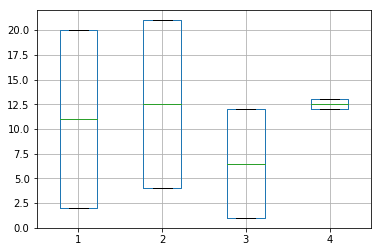

In [33]:
ta.boxplot(return_type='axes')

(8) get_dummies/

In [34]:
tb = pd.DataFrame([
    ["20", 21, 12, 13],
    ["2", 4, 1, 12],
    ["20", 21, 12, 13],
    ["", 4, 1, 12],
    [np.nan, 4, 1, 12]
], columns=list("ABCD"))
tb

,A,B,C,D
0,20,21,12,13
1,2,4,1,12
2,20,21,12,13
3,,4,1,12
4,NaN,4,1,12


In [35]:
for i in tb:
    print(pd.value_counts(tb[i]))

20    2
2     1
      1
Name: A, dtype: int64
4     3
21    2
Name: B, dtype: int64
1     3
12    2
Name: C, dtype: int64
12    3
13    2
Name: D, dtype: int64


In [36]:
pd.get_dummies(tb)

,B,C,D,A_,A_2,A_20
0,21,12,13,0,0,1
1,4,1,12,0,1,0
2,21,12,13,0,0,1
3,4,1,12,1,0,0
4,4,1,12,0,0,0


In [37]:
pd.get_dummies(tb, dummy_na=True)

,B,C,D,A_,A_2,A_20,A_nan
0,21,12,13,0,0,1,0
1,4,1,12,0,1,0,0
2,21,12,13,0,0,1,0
3,4,1,12,1,0,0,0
4,4,1,12,0,0,0,1


(9) Series*/

TEST 2017年5月23日08:10:09

In [38]:
tc = pd.get_dummies(tb)
tc

,B,C,D,A_,A_2,A_20
0,21,12,13,0,0,1
1,4,1,12,0,1,0
2,21,12,13,0,0,1
3,4,1,12,1,0,0
4,4,1,12,0,0,0


In [39]:
tc1 = tc['B'] > 0
tc2 = tc[['A_', 'A_2', 'A_20']]

In [40]:
for k in tc2:
    name_n = str(tc1.name)+'_'+str(tc2[k].name)
    print(pd.Series(tc1 * tc2[k], name=name_n))

0    0
1    0
2    0
3    1
4    0
Name: B_A_, dtype: uint8
0    0
1    1
2    0
3    0
4    0
Name: B_A_2, dtype: uint8
0    1
1    0
2    1
3    0
4    0
Name: B_A_20, dtype: uint8


(10) del/ drop/

In [41]:
td = pd.DataFrame(
    {
        1: [1, 3, 4, 5, 6],
        2: [1, 1, 4, 5, 6],
        3: [1, 3, 1, 5, 6],
        4: [1, 3, 4, 1, 6],
        5: [1, 3, 4, 5, 1]
     }
)
td

,1,2,3,4,5
0,1,1,1,1,1
1,3,1,3,3,3
2,4,4,1,4,4
3,5,5,5,1,5
4,6,6,6,6,1


In [42]:
# del td[1, 2]
# td

td = td.drop([1, 2], axis=1)
td

,3,4,5
0,1,1,1
1,3,3,3
2,1,4,4
3,5,1,5
4,6,6,1


(11) code/

```
import numpy as np

def generate_clustered_data(seed=0, n_clusters=3, n_features=2,
                            n_samples_per_cluster=20, std=.4):
    prng = np.random.RandomState(seed)

    # the data is voluntary shifted away from zero to check clustering
    # algorithm robustness with regards to non centered data
    means = np.array([[1, 1, 1, 0],
                      [-1, -1, 0, 1],
                      [1, -1, 1, 1],
                      [-1, 1, 1, 0],
                     ]) + 10
    print(means)

    X = np.empty((0, n_features))
    print(X)

    for i in range(n_clusters):
        X = np.r_[X, means[i][:n_features]
                  + std * prng.randn(n_samples_per_cluster, n_features)]
        print(X)
    return X
generate_clustered_data()
```

```
import numpy as np

from sklearn.utils.testing import assert_equal
from sklearn.utils.testing import assert_array_equal
from sklearn.utils.testing import assert_raises

from sklearn.cluster.affinity_propagation_ import AffinityPropagation
from sklearn.cluster.affinity_propagation_ import affinity_propagation
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import euclidean_distances

n_clusters = 3
centers = np.array([[1, 1], [-1, -1], [1, -1]]) + 10
print(centers)

X, _ = make_blobs(n_samples=60, n_features=2, centers=centers,
                  cluster_std=0.4, shuffle=True, random_state=0)
# print(X)


def test_affinity_propagation():
    # Affinity Propagation algorithm
    # Compute similarities
    S = -euclidean_distances(X, squared=True)
    print(S)

    preference = np.median(S) * 10
    print(preference)

    cluster_centers_indices, labels = affinity_propagation(
        S, preference=preference)
    print(cluster_centers_indices, labels)

    n_clusters_ = len(cluster_centers_indices)

    assert_equal(n_clusters, n_clusters_)

    af = AffinityPropagation(preference=preference, affinity="precomputed")
    labels_precomputed = af.fit(S).labels_
    print(labels_precomputed)

    af = AffinityPropagation(preference=preference, verbose=True)
    labels = af.fit(X).labels_
    print(labels)

    assert_array_equal(labels, labels_precomputed)

    cluster_centers_indices = af.cluster_centers_indices_
    print(cluster_centers_indices)

    n_clusters_ = len(cluster_centers_indices)
    assert_equal(np.unique(labels).size, n_clusters_)
    assert_equal(n_clusters, n_clusters_)

    # Test also with no copy
    _, labels_no_copy = affinity_propagation(S, preference=preference,
                                             copy=False)
    assert_array_equal(labels, labels_no_copy)

    # Test input validation
    assert_raises(ValueError, affinity_propagation, S[:, :-1])
    assert_raises(ValueError, affinity_propagation, S, damping=0)
    af = AffinityPropagation(affinity="unknown")
    assert_raises(ValueError, af.fit, X)
test_affinity_propagation()


def test_affinity_propagation_predict():
    # Test AffinityPropagation.predict
    af = AffinityPropagation(affinity="euclidean")
    labels = af.fit_predict(X)
    labels2 = af.predict(X)
    assert_array_equal(labels, labels2)


def test_affinity_propagation_predict_error():
    # Test exception in AffinityPropagation.predict
    # Not fitted.
    af = AffinityPropagation(affinity="euclidean")
    assert_raises(ValueError, af.predict, X)

    # Predict not supported when affinity="precomputed".
    S = np.dot(X, X.T)
    af = AffinityPropagation(affinity="precomputed")
    af.fit(S)
    assert_raises(ValueError, af.predict, X)
```

(12) ks/ 

TODO:

In [43]:
from scipy.stats import ks_2samp
ta=[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
      0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
a0=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
a1=[2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
      0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0]
a2=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
a3=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
a4=[0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
a5=[0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
a6=[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

ta = pd.Series(ta)
a0 = pd.Series(a0)
a1 = pd.Series(a1)
a2 = pd.Series(a2)
a3 = pd.Series(a3)
a4 = pd.Series(a4)
a5 = pd.Series(a5)
a6 = pd.Series(a6)

get_ks = lambda y1, y2: ks_2samp(y1[y2 == y1], y1[y2 != y1]).statistic

In [44]:
print('a0', get_ks(ta, a0))
print('a1', get_ks(ta, a1))
print('a2', get_ks(ta, a2))
print('a3', get_ks(ta, a3))
print('a4', get_ks(ta, a4))
print('a5', get_ks(ta, a5))
print('a6', get_ks(ta, a6))

a0 0.6296296296296295
a1 0.2065217391304348
a2 0.7777777777777778
a3 1.0
a4 0.4818577648766328
a5 0.4818577648766328
a6 0.6491228070175439


(13) stats.norm.rvs/

In [47]:
from scipy import stats
np.random.seed(12345678)
n1 = 200
n2 = 300
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
rvs3 = stats.norm.rvs(size=n2, loc=0.01, scale=1.0)
rvs4 = stats.norm.rvs(size=n2, loc=0.0, scale=1.0)

print(stats.ks_2samp(rvs1, rvs2))
print(stats.ks_2samp(rvs1, rvs3))
print(stats.ks_2samp(rvs1, rvs4))

Ks_2sampResult(statistic=0.20833333333333337, pvalue=4.667497551580699e-05)
Ks_2sampResult(statistic=0.10333333333333333, pvalue=0.14498781825751686)
Ks_2sampResult(statistic=0.07999999999999996, pvalue=0.4112694972985972)


(14) np.unique/ np.percentile/

In [48]:
score = [0.03148661,  0.79341859,  0.82668202,  0.84745973, 0.86047191]
score


[0.03148661, 0.79341859, 0.82668202, 0.84745973, 0.86047191]

In [50]:
l = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

cut0 = np.unique(
    np.percentile(score, l, interpolation='linear')
)
print('linear:\n', cut0)

cut0 = np.unique(
    np.percentile(score, l, interpolation='lower')
)
print('lower:\n', cut0)

cut0 = np.unique(
    np.percentile(score, l, interpolation='higher')
)
print('higher:\n', cut0)

cut0 = np.unique(
    np.percentile(score, l, interpolation='midpoint')
)
print('midpoint:\n', cut0)

cut0 = np.unique(
    np.percentile(score, l, interpolation='nearest')
)
print('nearest:\n', cut0)


linear:
 [0.03148661 0.3362594  0.64103219 0.80007128 0.81337665 0.82668202
 0.8349931  0.84330419 0.85006217 0.85526704 0.86047191]
lower:
 [0.03148661 0.79341859 0.82668202 0.84745973 0.86047191]
higher:
 [0.03148661 0.79341859 0.82668202 0.84745973 0.86047191]
midpoint:
 [0.03148661 0.4124526  0.81005031 0.82668202 0.83707087 0.85396582
 0.86047191]
nearest:
 [0.03148661 0.79341859 0.82668202 0.84745973 0.86047191]


In [51]:
s_max = np.max(score)
s_min = np.min(score)
s_t = (s_max - s_min) / 10.0
cut1 = np.unique([s_min, s_min + s_t, s_min + 2 * s_t, s_min + 3 * s_t,
                  s_min + 4 * s_t, s_min + 5 * s_t,
                  s_min + 6 * s_t, s_min + 7 * s_t,
                  s_min + 8 * s_t, s_min + 9 * s_t,
                  s_max])
print(cut1)

[0.03148661 0.11438514 0.19728367 0.2801822  0.36308073 0.44597926
 0.52887779 0.61177632 0.69467485 0.77757338 0.86047191]


(15) svm/ model/

In [52]:
# Import Library
from sklearn import svm
from sklearn.datasets import load_iris
import random

# SVM Classifier
def svm_classifier(train_x, train_y):
    from sklearn.svm import SVC
    model = SVC(probability=True)
    model.fit(train_x, train_y)
    return model

# 导入IRIS数据集
iris = load_iris()
sample_range = range(0, 150)
train_range = random.sample(sample_range, 100)
test_range = [e for e in sample_range if e not in train_range]
train_x = iris.data[train_range]
test_x = iris.data[test_range]

train_y = iris.target[train_range]
test_y = iris.target[test_range]
# print(train_y)
# print(test_y)

print('_____________________________________')
model = svm.SVC(probability=True)
model.fit(train_x, train_y)
predict = model.predict(test_x)
print(predict)
predict = model.predict_proba(test_x)
print(predict)
print('_____________________________________')
model = svm_classifier(train_x, train_y)
predict = model.predict(test_x)
print(predict)
predict = model.predict_proba(test_x)
print(predict)
print('_____________________________________')

#
# 测试结果一致,说明是数据集的问题
# 一种可能是因为占多数的类占比的比重太大了，SVM只找到了使损失函数最小化的方法
# 另一种可能是因为不平衡性并不严重，但是特征并不好，svm从你的特征之间学不到有用信息。
# 修改损失函数
#

_____________________________________
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2]
[[0.94181269 0.03337091 0.0248164 ]
 [0.95034266 0.0264007  0.02325664]
 [0.9318445  0.040796   0.0273595 ]
 [0.95292066 0.02477846 0.02230087]
 [0.94349118 0.02411791 0.03239091]
 [0.93794199 0.03793135 0.02412666]
 [0.92680504 0.04284621 0.03034875]
 [0.95502197 0.02359041 0.02138762]
 [0.94584703 0.02889113 0.02526184]
 [0.94595538 0.02982778 0.02421684]
 [0.94681412 0.0305773  0.02260859]
 [0.94202441 0.02950341 0.02847219]
 [0.95034266 0.0264007  0.02325664]
 [0.95689979 0.02108073 0.02201948]
 [0.9494898  0.02647541 0.02403479]
 [0.944058   0.03160865 0.02433335]
 [0.95063291 0.02419359 0.02517349]
 [0.9523077  0.0252902  0.0224021 ]
 [0.01303468 0.96028392 0.0266814 ]
 [0.01049014 0.93940867 0.05010119]
 [0.04901375 0.89629456 0.05469169]
 [0.01238594 0.96026722 0.02734684]
 [0.03185087 0.89197854 0.07617059]
 [0.0124184  0.90100151 0.08658

(16) sort/

In [53]:
score = [0.33148661, 0.82668202, 0.84745973, 0.86047191,
         0.88178507, 0.89047246, 0.89916648, 0.90969703,
         0.93082141, 0.6051739, 0.79341859]
score.sort()
print(score)
index = len(score)//10
for i in range(0, 10):
    if i == 9:
        print(score[i:])
    else:
        print(score[i:i+index])

[0.33148661, 0.6051739, 0.79341859, 0.82668202, 0.84745973, 0.86047191, 0.88178507, 0.89047246, 0.89916648, 0.90969703, 0.93082141]
[0.33148661]
[0.6051739]
[0.79341859]
[0.82668202]
[0.84745973]
[0.86047191]
[0.88178507]
[0.89047246]
[0.89916648]
[0.90969703, 0.93082141]


(17) type/

In [55]:
a = pd.DataFrame(['a'])
if isinstance(a, pd.DataFrame):
    print(1)
if type(a) == type(pd.DataFrame([])):
    print(1)
if type(a) == pd.core.frame.DataFrame:
    print(1)

1
1
1


(18) index/

In [57]:
a = pd.DataFrame([3, 1, 2, 3], index=['4a', '1a', '2b', '3c'])
print(a)
a.sort_index()
print(a)
a.sort_index(inplace=True)
print(a)

    0
4a  3
1a  1
2b  2
3c  3
    0
4a  3
1a  1
2b  2
3c  3
    0
1a  1
2b  2
3c  3
4a  3


(19) WOE/ IV/

```
# # -*-coding:utf-8-*-
# # @auth patrick201(YP) ivan
# # @time 2017年6月8日18:12:29
# # @goal WOE/IV Information_Value
# """
# V1.0 Github
# V1.1 Ivan
# """
# import numpy as np
# import math
# from scipy import stats
# from sklearn.utils.multiclass import type_of_target
#
#
# class WOE:
#     def __init__(self):
#         self._WOE_MIN = -20
#         self._WOE_MAX = 20
#
#     def woe(self, X, y, event=1):
#         """
#         Calculate woe of each feature category and information value
#         :param X: 2-D numpy array explanatory features which should be discreted already
#         :param y: 1-D numpy array target variable which should be binary
#         :param event: value of binary stands for the event to predict
#         :return: numpy array of woe dictionaries, each dictionary contains woe values
#                  for categories of each feature
#                  numpy array of information value of each feature
#         """
#         self.check_target_binary(y)
#         X1 = self.feature_discretion(X)
#
#         res_woe = []
#         res_iv = []
#         for i in range(0, X1.shape[-1]):
#             x = X1[:, i]
#             woe_dict, iv1 = self.woe_single_x(x, y, event)
#             res_woe.append(woe_dict)
#             res_iv.append(iv1)
#         return np.array(res_woe), np.array(res_iv)
#
#     def woe_single_x(self, x, y, event=1):
#         """
#         calculate woe and information for a single feature
#         :param x: 1-D numpy starnds for single feature
#         :param y: 1-D numpy array target variable
#         :param event: value of binary stands for the event to predict
#         :return: dictionary contains woe values for categories of this feature
#                  information value of this feature
#         """
#         self.check_target_binary(y)
#
#         event_total, non_event_total = self.count_binary(y, event=event)
#         # print(event_total, non_event_total)
#
#         x_labels = np.unique(x)
#         # print(x_labels)
#
#         woe_dict = {}
#         iv = 0
#         for x1 in x_labels:
#             y1 = y[np.where(x == x1)[0]]
#             event_count, non_event_count = self.count_binary(y1, event=event)
#             rate_event = 1.0 * event_count / event_total
#             rate_non_event = 1.0 * non_event_count / non_event_total
#             if rate_event == 0:
#                 woe1 = self._WOE_MIN
#             elif rate_non_event == 0:
#                 woe1 = self._WOE_MAX
#             else:
#                 woe1 = math.log(rate_event / rate_non_event)
#             woe_dict[x1] = woe1
#             iv += (rate_event - rate_non_event) * woe1
#         return woe_dict, iv
#
#     def woe_replace(self, X, woe_arr):
#         """
#         replace the explanatory feature categories with its woe value
#         :param X: 2-D numpy array explanatory features which should be discreted already
#         :param woe_arr: numpy array of woe dictionaries, each dictionary contains
#                woe values for categories of each feature
#         :return: the new numpy array in which woe values filled
#         """
#         if X.shape[-1] != woe_arr.shape[-1]:
#             raise ValueError('WOE dict array length must be equal with features length')
#
#         res = np.copy(X).astype(float)
#         idx = 0
#         for woe_dict in woe_arr:
#             for k in woe_dict.keys():
#                 woe = woe_dict[k]
#                 res[:, idx][np.where(res[:, idx] == k)[0]] = woe * 1.0
#             idx += 1
#
#         return res
#
#     def combined_iv(self, X, y, masks, event=1):
#         """
#         calcute the information vlaue of combination features
#         :param X: 2-D numpy array explanatory features which should be discreted already
#         :param y: 1-D numpy array target variable
#         :param masks: 1-D numpy array of masks stands for which features
#                are included in combination,
#                e.g. np.array([0,0,1,1,1,0,0,0,0,0,1]), the length should be same as features length
#         :param event: value of binary stands for the event to predict
#         :return: woe dictionary and information value of combined features
#         """
#         if masks.shape[-1] != X.shape[-1]:
#             raise ValueError('Masks array length must be equal with features length')
#
#         x = X[:, np.where(masks == 1)[0]]
#         tmp = []
#         for i in range(x.shape[0]):
#             tmp.append(self.combine(x[i, :]))
#
#         dumy = np.array(tmp)
#         # dumy_labels = np.unique(dumy)
#         woe, iv = self.woe_single_x(dumy, y, event)
#         return woe, iv
#
#     def combine(self, list):
#         res = ''
#         for item in list:
#             res += str(item)
#         return res
#
#     def count_binary(self, a, event=1):
#         event_count = (a == event).sum()
#         non_event_count = a.shape[-1] - event_count
#         return event_count, non_event_count
#
#     def check_target_binary(self, y):
#         """
#         check if the target variable is binary, raise error if not.
#         :param y:
#         :return:
#         """
#         y_type = type_of_target(y)
#         if y_type not in ['binary']:
#             raise ValueError('Label type must be binary')
#
#     def feature_discretion(self, X):
#         """
#         Discrete the continuous features of input data X,
#         and keep other features unchanged.
#         :param X : numpy array
#         :return: the numpy array in which all continuous features are discreted
#         """
#         temp = []
#         for i in range(0, X.shape[-1]):
#             x = X[:, i]
#             x_type = type_of_target(x)
#
#             if x_type == 'continuous':
#                 x1 = self.discrete(x)
#                 temp.append(x1)
#             else:
#                 temp.append(x)
#         return np.array(temp).T
#
#     def discrete(self, x):
#         """
#         Discrete the input 1-D numpy array using 5 equal percentiles
#         :param x: 1-D numpy array
#         :return: discreted 1-D numpy array
#         """
#         res = np.array([0] * x.shape[-1], dtype=int)
#         for i in range(5):
#             point1 = stats.scoreatpercentile(x, i * 20)
#             point2 = stats.scoreatpercentile(x, (i + 1) * 20)
#             x1 = x[np.where((x >= point1) & (x <= point2))]
#             mask = np.in1d(x, x1)
#             res[mask] = (i + 1)
#         return res
#
#     @property
#     def WOE_MIN(self):
#         return self._WOE_MIN
#
#     @WOE_MIN.setter
#     def WOE_MIN(self, woe_min):
#         self._WOE_MIN = woe_min
#
#     @property
#     def WOE_MAX(self):
#         return self._WOE_MAX
#
#     @WOE_MAX.setter
#     def WOE_MAX(self, woe_max):
#         self._WOE_MAX = woe_max
#
```

(20) inf/

In [61]:
-np.inf, np.inf, np.array([1])/np.array([0])


/data/soft/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(-inf, inf, array([inf]))

(21) sum/

Test 2017年6月14日08:54:20

In [62]:
a = pd.DataFrame([[1, 3, 4], [3, 6, 4]], columns=['a1', 'a2', 'a3'])
a


,a1,a2,a3
0,1,3,4
1,3,6,4


In [63]:
a['s1'] = sum(a['a1'])
a['a1/s1'] = a['a1']/a['s1']
a['s2'] = sum(a['a2'])
a['a2/s2'] = a['a2']/a['s2']
a['s3'] = sum(a['a3'])
a['a3/s3'] = a['a3']/a['s3']
a

,a1,a2,a3,s1,a1/s1,s2,a2/s2,s3,a3/s3
0,1,3,4,4,0.25,9,0.333333,8,0.5
1,3,6,4,4,0.75,9,0.666667,8,0.5


In [64]:
a.sum()

a1        4.0
a2        9.0
a3        8.0
s1        8.0
a1/s1     1.0
s2       18.0
a2/s2     1.0
s3       16.0
a3/s3     1.0
dtype: float64

(22) argwhere/ argmax/

In [67]:
a = np.array([1, 2, 4, 8])
b = np.array([3, 2, 5, 3])

a1 = np.argwhere(a == max(a))
b1 = np.argwhere(b == max(b))
b2 = np.argmax(b)

a1, b1, b2

(array([[3]]), array([[2]]), 2)

In [68]:
aa = [1, 3, 4]
print(aa.pop(0))
print(aa)
aa.insert(0, 122)
print(aa)

1
[3, 4]
[122, 3, 4]


In [70]:
a = {
    1: 5,
    2: 20
}
print(a)
print(max(a.values()))

max_a = 0
max_i = 0
for i in a:
    if a[i] > max_a:
        max_a = a[i]
        max_i = i
print(max_i, max_a)

b = [a[i] if a[i] > max_a else max_a for i in a]
print(b)

{1: 5, 2: 20}
20
2 20
[20, 20]


(23) corr().ix/

In [73]:
a = pd.DataFrame([[1, 2, 4], [2, 6, 3], [3, 10, 1]], columns=['a', 'b', 'c'])
a

,a,b,c
0,1,2,4
1,2,6,3
2,3,10,1


In [74]:
a[['a', 'b']].corr().ix[0, 1]

/data/soft/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


1.0

(24) r_/

In [76]:
a1 = [1, 2]
a2 = [1, 3]
print(np.r_[a1, a2])

a = a1 + a2
b = np.array(a)
b1 = np.array(a1)
b2 = np.array(a2)
print(b, b1, b2)

[1 2 1 3]
[1 2 1 3] [1 2] [1 3]


(25) date holiday/

```
# bugs
import datetime
date = []
holiday = {
    ['0101-0102']: 2,
    ['0402-0404', '0429-0501', '0528-0530']: 3,
    ['0127-0202']: 7,
    ['1001-1008']: 8
}

live_day = {
    u'元宵节': '0211',
    u'情人节': '0214',
    u'妇女节': '0308',
    u'植树节': '0312',
    u'愚人节': '0401',
    u'青年节': '0504',
    u'母亲节': '0514',
    u'儿童节': '0601',
    u'父亲节': '0618',
    u'七夕节': '0828',
    u'中元节': '0905',
    u'教师节': '0910',
    u'重阳节': '1028',
    u'感恩节': '1123',
    u'冬至节': '1222',
    u'平安夜': '1224',
    u'圣诞节': '1225',
}


def get_tomorr(i):
    now = datetime.datetime.strptime('20170101', '%Y%m%d')
    yes = now + datetime.timedelta(hours=24*(i-1))
    return yes.strftime('%m%d')


def get_tomorr1(i):
    r = i.split('-')
    i0, i1 = r[0], r[1]
    t = i0
    r1 = []
    while t <= i1:
        r1.append(t)
        now = datetime.datetime.strptime('2017'+t, '%Y%m%d')
        yes = now + datetime.timedelta(hours=24)
        t = yes.strftime('%m%d')
    return r1


for i in range(1, 366):
    d1 = get_tomorr(i)
    d2 = 0
    d3 = 0
    if d1 in live_day.values():
        d3 = 1
    print('2017'+d1+','+str(d2)+','+str(d3))
```

(26) -isin/

In [81]:
a = [1, 2, 3]
b = [2, 1]
a1 = pd.Series(a)
b1 = pd.Series(b)
print(a1)
print(b1)
print(a1[-a1.isin(b1)])

0    1
1    2
2    3
dtype: int64
0    2
1    1
dtype: int64
2    3
dtype: int64
